Thank you for agreeing to participate in UDST's second pilot workshop. You'll be working in this notebook tomorrow, it loads in the data for you and provides a useful function. Have fun!

In [20]:
#load in necessary libraries

%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import os

In [21]:
#load in particular modules (we'll likely load in more during the workshop)
from sklearn.cross_validation import train_test_split
from sklearn.cluster import KMeans
from sklearn import linear_model

In [22]:
#load the data
cwd = os.getcwd()
file_path = os.path.join(cwd, 'Speed Dating Data.csv')

#read the data
df = pd.read_csv(file_path, encoding='cp1252')
pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [23]:
#splitting the data by gender
female_df = df.loc[df['gender'] == 0]
male_df = df.loc[df['gender'] == 1]

In [24]:
#YOUR INPUT HERE, PUT IN THE FEATURES YOU'RE INTERESTED IN INVESTIGATING
features = ['dec','attr','sinc','intel','fun', 'amb', 'shar', 'prob']

In [25]:
female_decision_df=female_df.filter(features, axis=1)
female_decision_df.isnull().sum()

#for simplicity, we will remove all the rows with null entries
clean_female_decision_df = female_decision_df.dropna(axis=0, how='any')
clean_female_decision_df.shape

(3415, 8)

In [26]:
male_decision_df=male_df.filter(features, axis=1)
male_decision_df.isnull().sum()

#for simplicity, we will remove all the rows with null entries
clean_male_decision_df = male_decision_df.dropna(axis=0, how='any')
clean_male_decision_df.shape

(3555, 8)

In [27]:
yes_female = clean_female_decision_df.query('dec == 1')
no_female = clean_female_decision_df.query('dec == 0')
print('Proportion of acceptance by female is {}'.format(float(yes_female.shape[0])/clean_female_decision_df.shape[0]))

Proportion of acceptance by female is 0.372181551977


In [28]:
yes_male = clean_male_decision_df.query('dec == 1')
no_male = clean_male_decision_df.query('dec == 0')
print('Proportion of acceptance by male is {}'.format(float(yes_male.shape[0])/clean_male_decision_df.shape[0]))

Proportion of acceptance by male is 0.488326300985


In [29]:
#useful function
def plot_feature(feature):
    ax = plt.subplot(211)
    ax.set_title('female')
    x = [no_female[feature].values]
    y = [yes_female[feature].values]
    plt.hist([x, y], label=['no','yes'])
    ax.legend()
    
    ax = plt.subplot(212)
    ax.set_title('male')
    x = [no_male[feature].values]
    y = [yes_male[feature].values]
    plt.hist([x, y], label=['no','yes'])
    ax.legend()
    plt.show()

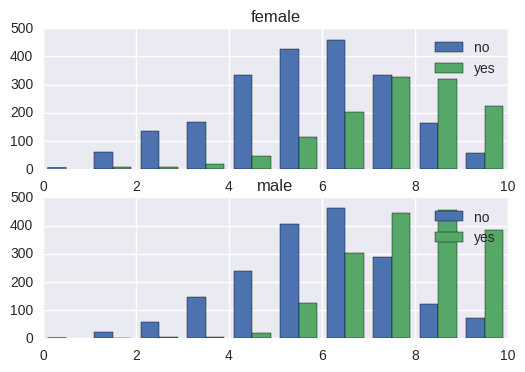

In [31]:
#enter the feature you'd like to plot
plot_feature('attr')

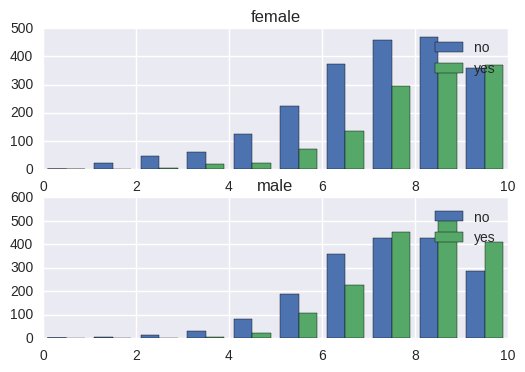

In [32]:
plot_feature('sinc')

In [33]:
female_train, female_test = train_test_split(clean_female_decision_df, test_size = 0.2, random_state=42)
male_train, male_test = train_test_split(clean_male_decision_df, test_size = 0.2, random_state=42)

In [34]:
lr = linear_model.LogisticRegression()

In [37]:
predictors = ['attr', 'fun']
female_model = lr.fit(female_train[predictors].values, female_train['dec'].values)
print('female: training set performance is {}'.format(female_model.score(female_train[predictors].values, 
                                                                         female_train['dec'].values)))
print('female: test set performance is {}'.format(female_model.score(female_test[predictors].values, 
                                                                         female_test['dec'].values)))
print(female_model.coef_)

female: training set performance is 0.741581259151
female: test set performance is 0.711566617862
[[ 0.3914477   0.34773372]]


In [38]:
male_model = lr.fit(male_train[predictors].values, male_train['dec'].values)
print('male: training set performance is {}'.format(male_model.score(male_train[predictors].values, 
                                                                         male_train['dec'].values)))
print('male: test set performance is {}'.format(male_model.score(male_test[predictors].values, 
                                                                         male_test['dec'].values)))
print(male_model.coef_)

male: training set performance is 0.746483825598
male: test set performance is 0.731364275668
[[ 0.65007789  0.2390281 ]]
